In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

In [2]:
df = pd.read_csv('results/sim_trace.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4 non-null      int64  
 1   type            4 non-null      object 
 2   app             4 non-null      int64  
 3   module          4 non-null      object 
 4   message         4 non-null      object 
 5   DES.src         4 non-null      int64  
 6   DES.dst         4 non-null      int64  
 7   TOPO.src        4 non-null      int64  
 8   TOPO.dst        4 non-null      int64  
 9   module.src      4 non-null      object 
 10  service         4 non-null      float64
 11  time_in         4 non-null      float64
 12  time_out        4 non-null      float64
 13  time_emit       4 non-null      float64
 14  time_reception  4 non-null      float64
dtypes: float64(5), int64(6), object(4)
memory usage: 608.0+ bytes


In [4]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [5]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [6]:
df.head(10)

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:01:41,1,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,...,101.000020,101.042877,100.0,101.00002,1.00002,0.000000,0.042857,0.042857,1.042877,1970-01-01 00:01:41
1970-01-01 00:01:41,4,COMP_M,0,0_01,M.USER.APP.0,3,4,4,0,None,...,101.042877,101.085734,100.0,101.00002,1.00002,0.042857,0.042857,0.085714,1.085734,1970-01-01 00:01:41
1970-01-01 00:01:42,2,COMP_M,0,0_01,M.USER.APP.0,1,4,2,0,None,...,102.000040,102.042897,100.0,102.00004,2.00004,0.000000,0.042857,0.042857,2.042897,1970-01-01 00:01:42
1970-01-01 00:01:43,3,COMP_M,0,0_01,M.USER.APP.0,2,4,3,0,None,...,103.000060,103.042917,100.0,103.00006,3.00006,0.000000,0.042857,0.042857,3.042917,1970-01-01 00:01:43


In [7]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [8]:
df_resample.shape

(1, 1)

In [9]:
timeLatency = df_resample.time_latency.values

In [10]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

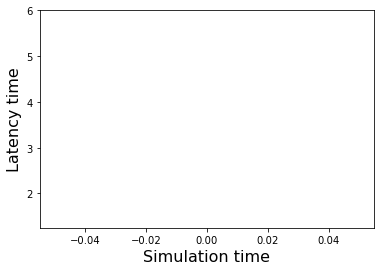

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Latency

In [12]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [13]:
df_resample.shape

(1, 1)

In [14]:
timeLatency = df_resample.time_latency.values

In [15]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

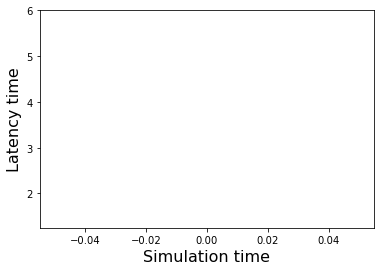

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Hop Count

In [17]:
# Hop count
cache_distance = {}

In [18]:
G = nx.read_graphml('results/graph.graphml')

In [19]:
print(G.nodes())

['0', '1', '2', '3', '4']


In [20]:
def compute_distance(k):
    return nx.shortest_path_length(G,str(k[0]),str(k[1]))

In [21]:
for row in df[["TOPO.src","TOPO.dst"]].iterrows():
    k = (row[1][0],row[1][1])
    if not k in cache_distance.keys():
        cache_distance[k] = compute_distance(k)

In [22]:
x = cache_distance.values() 
counter = collections.Counter(x)
print(counter)

Counter({1: 2, 2: 2})


In [23]:
data_a = {}
for k in range(5):
    data_a[k] = counter[k]

In [24]:
data_a

{0: 0, 1: 2, 2: 2, 3: 0, 4: 0}

In [25]:
data_a = data_a.values()

In [26]:
ticks = range(5)

In [27]:
N = len(ticks)
ind = np.array(ticks)
width = 0.45

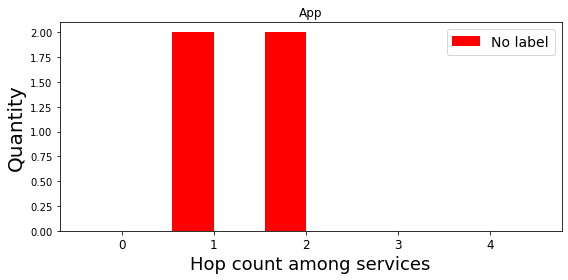

In [28]:
fig, ax = plt.subplots(figsize=(8.0,4.0))
ax.get_xaxis().set_ticks(range(0, len(ticks) * 2, 2))
r = ax.bar(ind, data_a, width, color='r')
ax.set_xticks(ind+ width/2)
ax.set_xticklabels(ticks, fontsize=12)
ax.set_title("App")
ax.set_xlim(-width, len(ticks))
ax.plot([], c='#a6bddb', label="No LABEL",linewidth=3)
ax.set_xlabel("Hop count among services", fontsize=18)
ax.set_ylabel("Quantity", fontsize=20)
plt.legend([r],['No label'],loc="upper right",fontsize=14)
plt.tight_layout()

In [29]:
df_link = pd.read_csv('results/sim_trace_link.csv')

In [30]:
df_link.head(60)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,1,0,0,1.00002,M.USER.APP.0,100.00000,20,0
1,2,LINK,2,1,0,1.00002,M.USER.APP.0,100.00000,20,1
2,3,LINK,3,1,0,1.00002,M.USER.APP.0,100.00000,20,2
3,4,LINK,4,0,0,1.00002,M.USER.APP.0,100.00000,20,3
4,2,LINK,1,0,0,1.00002,M.USER.APP.0,101.00002,20,0
5,3,LINK,1,0,0,1.00002,M.USER.APP.0,101.00002,20,1


In [31]:
total_messages = len(df_link)
print(f'total messages transmited = {total_messages}')

total messages transmited = 6


In [32]:
bytes_transmited = df_link["size"].sum()
print(f'total bytes transmited = {bytes_transmited}')

total bytes transmited = 120


In [33]:
def utilization(id_entity, total_time, from_time=0.0):
        if "time_service" not in df.columns: #cached
            df["time_service"] = df.time_out - df.time_in
        values = df.groupby("DES.dst").time_service.agg("sum")
        return values[id_entity] / total_time

In [34]:
values = df.groupby("DES.dst").time_service.agg("sum")

In [35]:
values

DES.dst
4    0.171429
Name: time_service, dtype: float64